In [141]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np
import scipy.signal as sig

%matplotlib widget

# code modified to change negative values to positive ones
def lmap(f,x):
    return list(map(f,x))

# code modified to change negative values to positive ones
def lfilter(f,x):
    return list(filter(f,x))

def loadCSV(path, x_id=0, y_id=1):
    with open(path) as inp:
        lines = inp.read().split("\n")[1:-2]
        rows = lmap(lambda l: lmap(float, l.strip().split(",")), lines)

        return {"x": lmap(lambda r: r[x_id], rows), "y": lmap(lambda r: r[y_id], rows)}

moment arm: 73,4mm

0.5660527303765392
2.1591702086527786
0.7785855399231209
0.7172585967099984
1.9392547244381437
3.3244366704653894


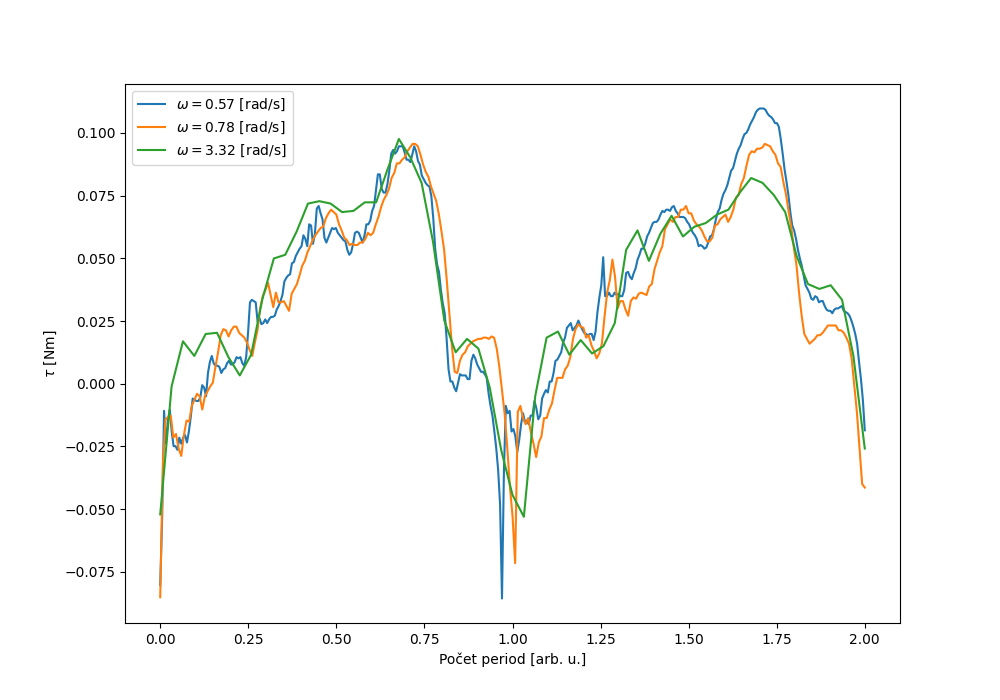

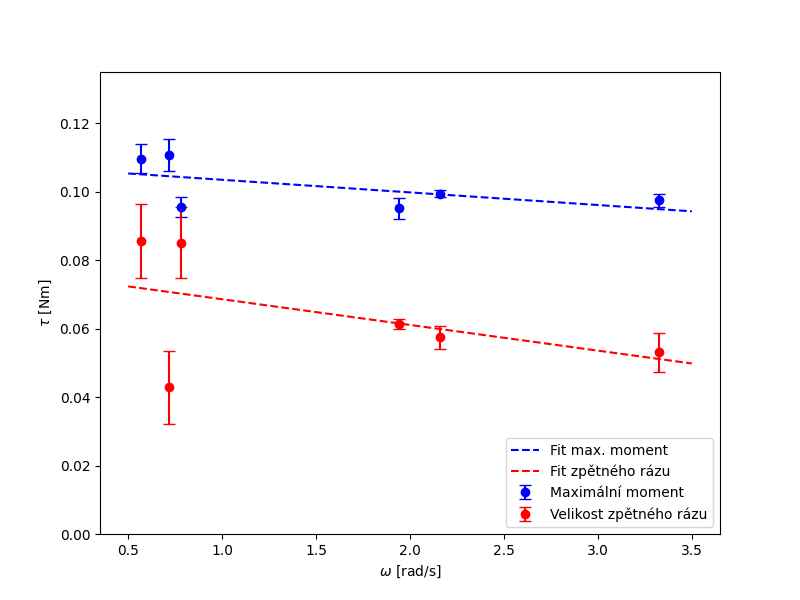

In [142]:
u1 = loadCSV("./unsupported4.csv", 16, 17)  # speed4
u2 = loadCSV("./unsupported4.csv", 14, 15)  # speed3
u4 = loadCSV("./unsupported4.csv", 10, 11)  # speed2
u3 = loadCSV("./unsupported4.csv", 12, 13)  # speed1
u5 = loadCSV("./unsupported4.csv", 8, 9)  # speed1
u6 = loadCSV("./unsupported4.csv", 6, 7)  # speed1

moment_arm = 73.4 * 1e-3

plt.figure(figsize=(10, 7))


def cut_off_start(data, doplot=False):
    peaks, _ = sig.find_peaks(np.array(data["y"]) * -1, height=0.4)
    peaks = lmap(int, peaks)

    dt = (data["x"][peaks[2]] - data["x"][peaks[0]]) / 2
    omeg = 2 * math.pi / 12 * 1 / dt
    print(omeg)

    data["x"] = lmap(lambda x: x - data["x"][peaks[0]], data["x"])
    _y = lmap(lambda y: y * moment_arm, data["y"][peaks[0] : peaks[2]])
    if doplot:
        plt.plot(
            np.linspace(0, 2, len(data["x"][peaks[0] : peaks[2]])),
            _y,
            label=f"$\omega = {omeg:.2f}$ [rad/s]",
        )

    return (omeg, max(_y), -min(_y))


(o4, torque4, feedback4) = cut_off_start(u4, True)
(o1, torque1, feedback1) = cut_off_start(u1)
(o2, torque2, feedback2) = cut_off_start(u2, True)
(o3, torque3, feedback3) = cut_off_start(u3)
(o5, torque5, feedback5) = cut_off_start(u5)
(o6, torque6, feedback6) = cut_off_start(u6, True)

torques = [
    torque1,
    torque2,
    torque3,
    torque4,
    torque5,
    torque6,
]
feedbacks = [
    feedback1,
    feedback2,
    feedback3,
    feedback4,
    feedback5,
    feedback6,
]
os = [o1, o2, o3, o4, o5, o6]

plt.legend()
plt.ylabel("$\\tau$ [Nm]")
plt.xlabel("Počet period [arb. u.]")
plt.savefig("transmission_torque_in_time.png", dpi=750)

plt.figure(figsize=(8,6))
plt.xlabel("$\omega$ [rad/s]")
plt.ylabel("$\\tau$ [Nm]")
plt.ylim(0,0.135)

plt.errorbar(
    os,
    torques,
    (np.array(torques) - np.average(torques))/2,
    label="Maximální moment",
    color="b",
    marker="o",
    linestyle="",
    capsize=4,
)
m1,b1 = np.polyfit(os, torques, 1)
X = np.linspace(0.5,3.5, 100)
plt.plot(X, X*m1 + b1, "b--", label="Fit max. moment")

plt.errorbar(
    os,
    feedbacks,
    (np.array(feedbacks) - np.average(feedbacks))/2,
    label="Velikost zpětného rázu",
    color="r",
    marker="o",
    linestyle="",
    capsize=4,
)
m2,b2 = np.polyfit(os, feedbacks, 1)
plt.plot(X, X*m2 + b2, "r--", label="Fit zpětného rázu")

plt.legend(loc=4)
plt.savefig("transmission_max_torque_in_speed.png", dpi=750)
